# Flight Price Prediction

**Problem Statement:**

Flight ticket prices can be something hard to guess, today we might see as price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here we will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

**FEATURES:**
    
**Airline:** The name of the airline.

**Date_of_Journey:** The date of the journey

**Source:** The source from which the service begins.

**Destination:** The destination where the service ends.

**Route:** The route taken by the flight to reach the destination.

**Dep_Time:** The time when the journey starts from the source.

**Arrival_Time:** Time of arrival at the destination.

**Duration:** Total duration of the flight.

**Total_Stops:** Total stops between the source and destination.

**Additional_Info:** Additional information about the flight

**Target Variable**

**Price:** The price of the ticket

We have to use our skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore 
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split ,  cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import  Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [119]:
Fdf = pd.read_excel('Data_Train.xlsx')

In [120]:
Fdf

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Exploratpry Data Analysis (EDA)

In [121]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [122]:
Fdf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Airline

In [123]:
Fdf['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

#sns.swarmplot(x="Source", y="Price", data=Fdf)

We can also use the code above to plot Price of a single Airline , But my system is not capable of plotting swarmplot of such big data so I'm using a simpler plot to plot this distribution. 

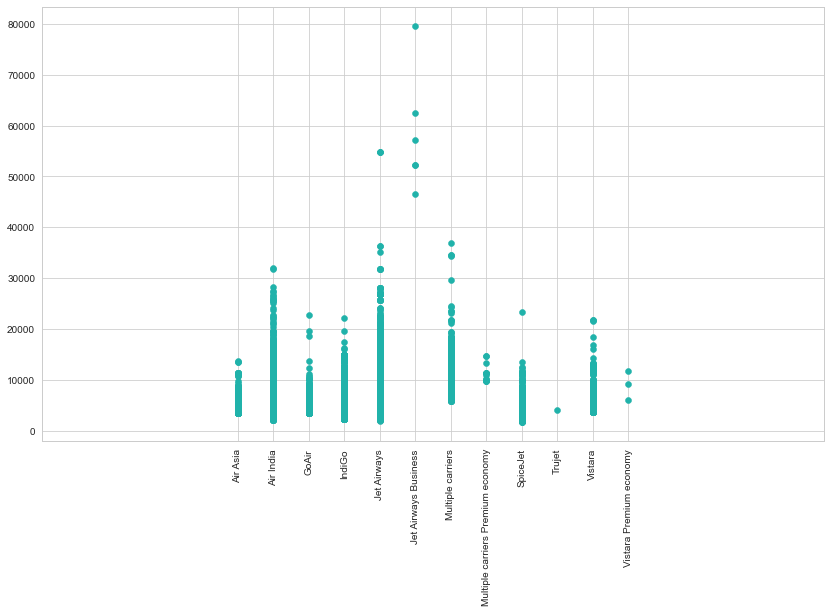

In [124]:
plt.figure(figsize=(14,8))
unique , inv = np.unique(Fdf["Airline"], return_inverse=True) 
plt.scatter(inv, Fdf["Price"] , c = 'lightseagreen')
plt.xticks(range(len(unique)),unique , rotation = 90)
plt.margins(x=0.5)
plt.show()

<!-- From above we can observe the distributions of destination of Airlines with respect to their ticket prices. -->

Here we can observe the variations in ticket price of various Airlines.

#### Source

In [125]:
Fdf['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

#sns.swarmplot(x="Source", y="Price", data=Fdf)

We can also use the code above to plot Price of a single Airline , But my system is not capable of plotting swarmplot of such big data so I'm using a simpler plot to plot this distribution. 

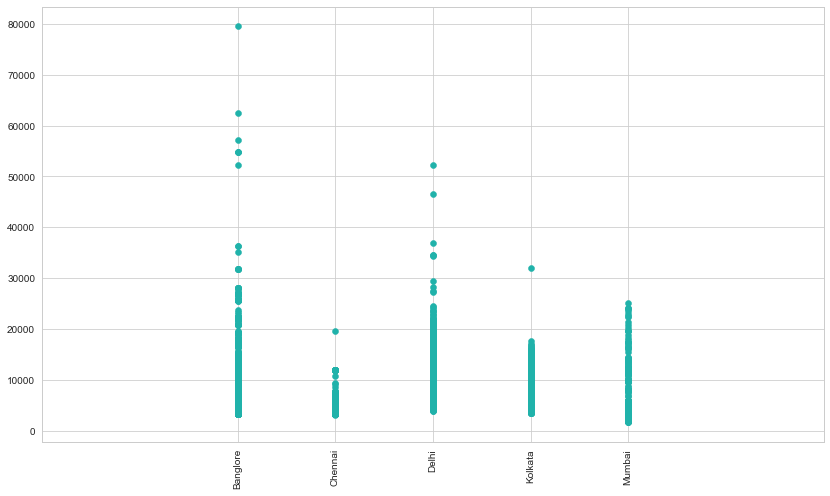

In [126]:
plt.figure(figsize=(14,8))
unique , inv = np.unique(Fdf["Source"], return_inverse=True) 
plt.scatter(inv, Fdf["Price"] , c = 'lightseagreen')
plt.xticks(range(len(unique)),unique , rotation = 90)
plt.margins(x=0.5)
plt.show()

Here we can observe the variatioin in prices of the tickets of a particular source airport . 

#### Destination

In [127]:
Fdf['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

#sns.swarmplot(x="Destination", y="Price", data=Fdf)

We can also use the code above to plot Price of a single Airline , But my system is not capable of plotting swarmplot of such big data so I'm using a simpler plot to plot this distribution. 

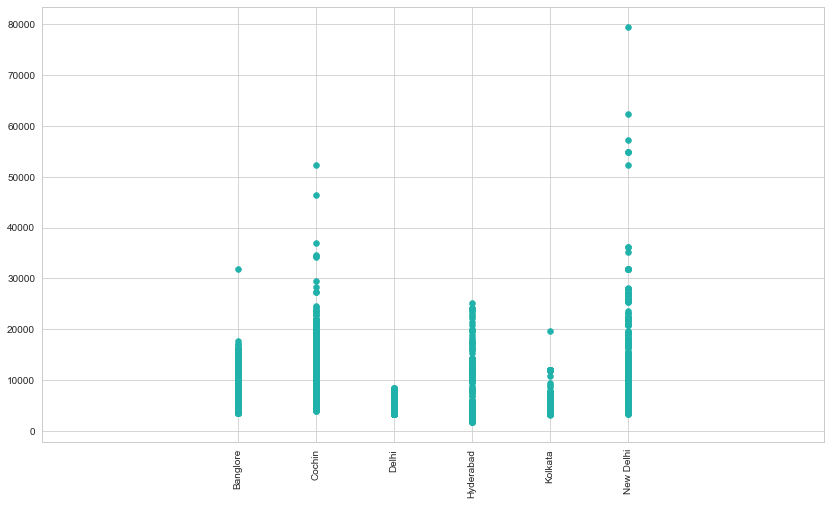

In [128]:
plt.figure(figsize=(14,8))
unique , inv = np.unique(Fdf["Destination"], return_inverse=True) 
plt.scatter(inv, Fdf["Price"] , c = 'lightseagreen')
plt.xticks(range(len(unique)),unique , rotation = 90)
plt.margins(x=0.5)
plt.show()

Here we can observe the variatioin in prices of the tickets of a particular source airport . 

In [129]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Data Preprocessing

In [130]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### AirLine

In [131]:
Fdf['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [132]:
Fdf['Airline'] = Fdf['Airline'].replace(['GoAir','Multiple carriers Premium economy' , 'Jet Airways Business' , 
                                         'Vistara Premium economy', 'Trujet'] , 'other' )

In [133]:
Fdf['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1752
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
other                 217
Name: Airline, dtype: int64

In [134]:
le = LabelEncoder()
Fdf['Airline'] = le.fit_transform(Fdf['Airline'])

In [135]:
Fdf['Airline'].value_counts()

3    3849
2    2053
1    1752
4    1196
5     818
6     479
0     319
7     217
Name: Airline, dtype: int64

#### Date_of_Journey

In [136]:
Fdf['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

In [137]:
Fdf['Date_of_Journey'] = pd.to_datetime(Fdf['Date_of_Journey'])

Creating new features as day and month.

In [138]:
Fdf['Day'] = Fdf['Date_of_Journey'].dt.day

In [139]:
Fdf['Month'] = Fdf['Date_of_Journey'].dt.month

In [140]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  int32         
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(3), object(8)
memory usage: 1.0+ MB


We will drop Date_of_journey later on in feature selection procedure.

#### Source

In [141]:
Fdf['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [142]:
le = LabelEncoder()
Fdf['Source'] = le.fit_transform(Fdf['Source'])

In [143]:
Fdf['Source'].value_counts()

2    4537
3    2871
0    2197
4     697
1     381
Name: Source, dtype: int64

#### Destination

In [144]:
Fdf['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [145]:
le = LabelEncoder()
Fdf['Destination'] = le.fit_transform(Fdf['Destination'])

In [146]:
Fdf['Destination'].value_counts()

1    4537
0    2871
2    1265
5     932
3     697
4     381
Name: Destination, dtype: int64

#### Route

In [147]:
Fdf['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → BOM → IXC → DEL             1
BOM → UDR → DEL → HYD             1
BLR → HBX → BOM → AMD → DEL       1
BOM → RPR → VTZ → HYD             1
BOM → JDH → JAI → DEL → HYD       1
Name: Route, Length: 128, dtype: int64

In [148]:
Fdf['Route'].isnull().sum()

1

In [149]:
Fdf['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In here we can find that there are 5 different routes So we'll just split them and create new features with different routes .

In [150]:
Fdf['Route1']=Fdf['Route'].str.split('→ ').str[0]
Fdf['Route2']=Fdf['Route'].str.split('→ ').str[1]
Fdf['Route3']=Fdf['Route'].str.split('→ ').str[2]
Fdf['Route4']=Fdf['Route'].str.split('→ ').str[3]
Fdf['Route5']=Fdf['Route'].str.split('→ ').str[4]

Here we are filling the null values with none .

In [151]:
Fdf['Route1'].fillna("None",inplace=True)
Fdf['Route2'].fillna("None",inplace=True)
Fdf['Route3'].fillna("None",inplace=True)
Fdf['Route4'].fillna("None",inplace=True)
Fdf['Route5'].fillna("None",inplace=True)

In [152]:
le = LabelEncoder()
Fdf['Route1'] = le.fit_transform(Fdf['Route1'])
Fdf['Route2'] = le.fit_transform(Fdf['Route2'])
Fdf['Route3'] = le.fit_transform(Fdf['Route3'])
Fdf['Route4'] = le.fit_transform(Fdf['Route4'])
Fdf['Route5'] = le.fit_transform(Fdf['Route5'])

In [153]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  int32         
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  int32         
 3   Destination      10683 non-null  int32         
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
 13  Route1           10683 non-null  int32         
 14  Route2           10683 non-null  int32

#### Dep_Time 

In [154]:
Fdf['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
21:40      1
04:15      1
21:35      1
16:25      1
04:50      1
Name: Dep_Time, Length: 222, dtype: int64

In [155]:
Fdf['Dep_Time'] = pd.to_datetime(Fdf['Dep_Time'])

Extracting hour from our Dep_TIme feature .

In [156]:
Fdf['Dep_time'] = Fdf['Dep_Time'].dt.hour

In [157]:
Fdf['Dep_time'].value_counts()

9     916
7     867
8     697
17    695
6     687
20    651
5     629
11    580
19    567
10    536
14    523
21    492
16    472
18    444
13    417
22    387
15    319
2     194
12    178
4     170
23    161
0      40
1      37
3      24
Name: Dep_time, dtype: int64

#### Arrival_Time

In [158]:
Fdf['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
02:20 04 May      1
08:15 22 Apr      1
02:15 07 May      1
02:15 07 Jun      1
10:50 16 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [159]:
Fdf['Arrival_Time'] = pd.to_datetime(Fdf['Arrival_Time'])

In [160]:
Fdf['Arrival_time'] = Fdf['Arrival_Time'].dt.hour

In [161]:
Fdf['Arrival_time'].value_counts()

19    1626
12     897
4      838
21     703
22     647
1      529
18     514
9      490
23     485
10     476
8      471
7      417
20     377
16     370
0      322
13     308
11     298
14     295
17     191
15     182
2       79
5       69
6       52
3       47
Name: Arrival_time, dtype: int64

#### Duration

In [162]:
Fdf['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
4h 10m       1
33h 20m      1
42h 5m       1
35h 20m      1
5m           1
Name: Duration, Length: 368, dtype: int64

#### Total_Stops

In [163]:
Fdf['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [164]:
Fdf['Total_Stops'].isnull().sum()

1

In [165]:
Fdf['Total_Stops'] = Fdf['Total_Stops'].fillna('1 stop')

In [166]:
Fdf['Total_Stops'].replace('non-stop' , '0 stop' ,inplace = True )

In [167]:
Fdf['Total_Stops'].value_counts()

1 stop     5626
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
Name: Total_Stops, dtype: int64

In [168]:
le = LabelEncoder()
Fdf['Total_Stops'] = le.fit_transform(Fdf['Total_Stops'])

In [169]:
Fdf['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

#### Additional_Info

In [170]:
Fdf['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Here out of 10682 values 8345 values are having No info. So we'll drop this feature in feature selection procedure .

#### Price

In [171]:
Fdf['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
9502       1
13875      1
7742       1
5703       1
4098       1
Name: Price, Length: 1870, dtype: int64

### Feature Selection 

In [172]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  int32         
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  int32         
 3   Destination      10683 non-null  int32         
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  int32         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Day              10683 non-null  int64         
 12  Month            10683 non-null  int64         
 13  Route1           10683 non-null  int32         
 14  Route2           10683 non-null  int32

We have successfully dealt with Date_of_Journey , Route , Duration ,Dep_Time , Arrival_Time and Additional_Info , So now we'll drop these features.

In [173]:
Fdf = Fdf.drop(['Date_of_Journey' , 'Route' , 'Duration' ,'Dep_Time' , 'Arrival_Time', 'Additional_Info' ] , axis = 1)

In [174]:
Fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Airline       10683 non-null  int32
 1   Source        10683 non-null  int32
 2   Destination   10683 non-null  int32
 3   Total_Stops   10683 non-null  int32
 4   Price         10683 non-null  int64
 5   Day           10683 non-null  int64
 6   Month         10683 non-null  int64
 7   Route1        10683 non-null  int32
 8   Route2        10683 non-null  int32
 9   Route3        10683 non-null  int32
 10  Route4        10683 non-null  int32
 11  Route5        10683 non-null  int32
 12  Dep_time      10683 non-null  int64
 13  Arrival_time  10683 non-null  int64
dtypes: int32(9), int64(5)
memory usage: 793.0 KB


### Visualising & Removing Outliers 

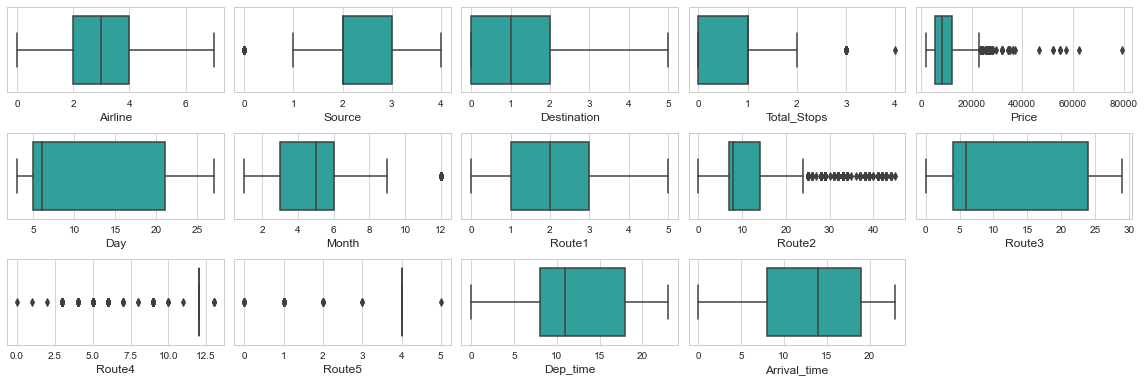

In [176]:
collist=Fdf.columns.values
ncol=5
nrows=7
plt.figure(figsize=(16,12))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Fdf[collist[i]],color='lightseagreen')
    plt.tight_layout()

From above we can observe that there are Outliers in our dataset , so we need to deal with them.<br>

Finding **ZScore**

A  **Z-score** is a numerical measurement that describes a value's relationship to the mean of a group of values. Z-score is measured in terms of standard deviations from the mean. If a Z-score is 0, it indicates that the data point's score is identical to the mean score. A Z-score of 1.0 would indicate a value that is one standard deviation from the mean.

From above we can observe that there are outliers in this dataset , so we'll remove them

In [177]:
Z_score = np.abs(zscore(Fdf))

In [178]:
Fdf.shape

(10683, 14)

In [179]:
Fdf_wo = Fdf[(Z_score<3).all(axis= 1)]

In [180]:
Fdf_wo.shape

(10109, 14)

We have successfully removed the outliers from our dataset

#### Preictor & Target variable

In [181]:
x_predictor = Fdf_wo.drop('Price' , axis = 1)
x_predictor

,Airline,Source,Destination,Total_Stops,Day,Month,Route1,Route2,Route3,Route4,Route5,Dep_time,Arrival_time
0,2,0,5,0,24,3,0,13,24,12,4,22,1
2,3,2,1,2,6,9,3,32,4,5,4,9,4
3,2,3,0,1,5,12,2,34,3,12,4,18,23
4,2,0,5,1,3,1,0,34,8,12,4,16,21
5,5,3,0,0,24,6,2,5,24,12,4,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,4,9,2,5,24,12,4,19,22
10679,1,3,0,0,27,4,2,5,24,12,4,20,23
10680,3,0,2,0,27,4,0,13,24,12,4,8,11
10681,6,0,5,0,3,1,0,13,24,12,4,11,14


In [182]:
y = Fdf_wo['Price']
y

0         3897
2        13882
3         6218
4        13302
5         3873
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10109, dtype: int64

#### Checking for Skewness and removing Skewness

In [183]:
x_predictor.skew()

Airline         0.514203
Source         -0.385028
Destination     1.238600
Total_Stops     0.244051
Day             0.345121
Month           0.643017
Route1         -0.619386
Route2          1.312574
Route3          0.530215
Route4         -2.424171
Route5          0.000000
Dep_time        0.073771
Arrival_time   -0.393655
dtype: float64

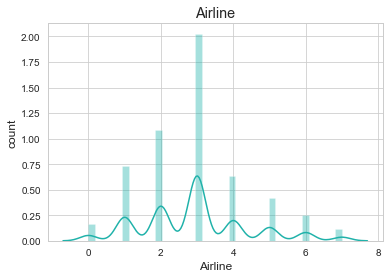

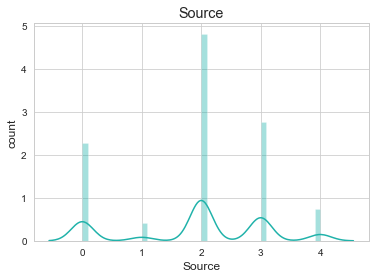

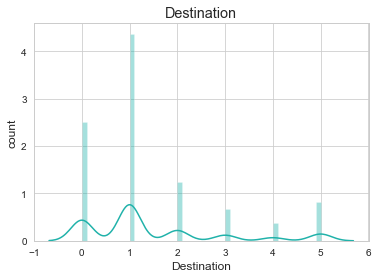

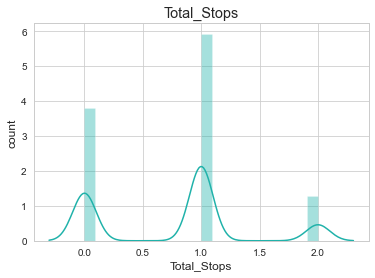

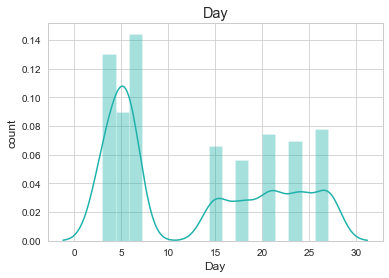

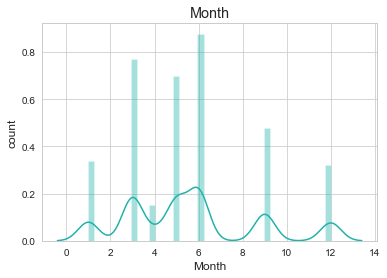

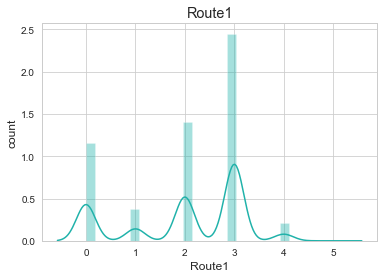

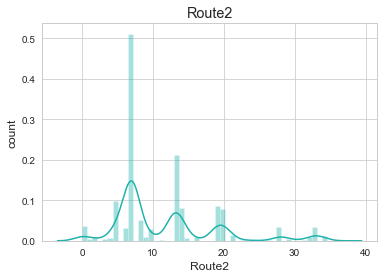

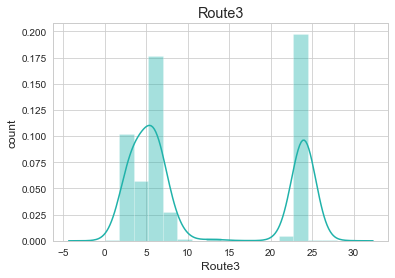

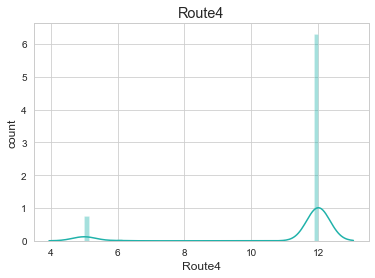

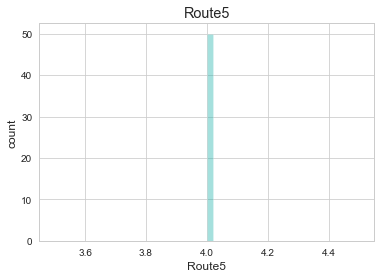

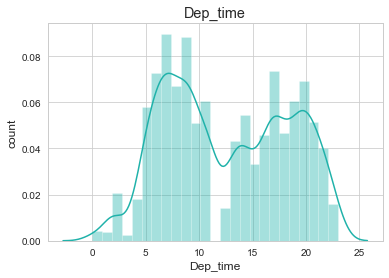

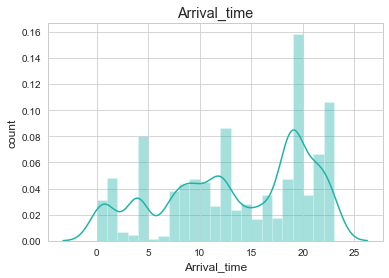

In [184]:
for feature in x_predictor :
    sns.distplot(x_predictor[feature] , kde = True ,color ='lightseagreen' )
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

The rule of thumb seems to be: If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.

Here we can observe that there is skewness in our dataset . 

So we will use **PowerTransformer** for transforming/removing skewness from our dataset .

In [185]:
powert = PowerTransformer( method = 'yeo-johnson' , standardize = False)
x_t = powert.fit_transform(x_predictor)

In [186]:
x_t

array([[ 1.53385079e+00,  0.00000000e+00,  1.48938756e+00, ...,
         9.97825786e+02,  1.16483641e+01,  1.01351178e+00],
       [ 2.12383640e+00,  2.28177509e+00,  6.44388085e-01, ...,
         9.97825786e+02,  5.81773070e+00,  4.14333366e+00],
       [ 1.53385079e+00,  3.56663244e+00, -0.00000000e+00, ...,
         9.97825786e+02,  9.99145773e+00,  2.49319654e+01],
       ...,
       [ 2.12383640e+00,  0.00000000e+00,  9.79493900e-01, ...,
         9.97825786e+02,  5.29670736e+00,  1.16751511e+01],
       [ 3.59410466e+00,  0.00000000e+00,  1.48938756e+00, ...,
         9.97825786e+02,  6.81679458e+00,  1.49583295e+01],
       [ 8.52292929e-01,  2.28177509e+00,  6.44388085e-01, ...,
         9.97825786e+02,  6.32384993e+00,  2.04795158e+01]])

In [187]:
x_trans = pd.DataFrame(x_t , columns = x_predictor.columns)
x_trans

,Airline,Source,Destination,Total_Stops,Day,Month,Route1,Route2,Route3,Route4,Route5,Dep_time,Arrival_time
0,1.533851,0.000000,1.489388,0.000000,3.145752,1.849677,0.000000,4.106631,1.992386,3.995257e+11,997.825786,11.648364,1.013512
1,2.123836,2.281775,0.644388,1.420567,1.919025,3.768733,4.500371,6.357404,1.251973,6.111639e+07,997.825786,5.817731,4.143334
2,1.533851,3.566632,-0.000000,0.813252,1.768948,4.459879,2.721717,6.535188,1.115083,3.995257e+11,997.825786,9.991458,24.931965
3,1.533851,0.000000,1.489388,0.813252,1.372613,0.798134,0.000000,6.535188,1.568280,3.995257e+11,997.825786,9.125497,22.702226
4,3.140659,3.566632,-0.000000,0.000000,3.145752,2.937677,2.721717,2.404318,1.992386,3.995257e+11,997.825786,5.817731,11.675151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,0.000000,3.566632,-0.000000,0.000000,1.591017,3.768733,2.721717,2.404318,1.992386,3.995257e+11,997.825786,10.414450,23.816255
10105,0.852293,3.566632,-0.000000,0.000000,3.253884,2.254723,2.721717,2.404318,1.992386,3.995257e+11,997.825786,10.831358,24.931965
10106,2.123836,0.000000,0.979494,0.000000,3.253884,2.254723,0.000000,4.106631,1.992386,3.995257e+11,997.825786,5.296707,11.675151
10107,3.594105,0.000000,1.489388,0.000000,1.372613,0.798134,0.000000,4.106631,1.992386,3.995257e+11,997.825786,6.816795,14.958329


#### Scaling

Gaussian's distribution with zero mean and unit variance is standard scaling.

In [188]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_s = scaler.fit_transform(x_trans)
x_s

array([[-0.576776  , -1.59435438,  1.7835716 , ...,  0.        ,
         1.5311508 , -1.79372337],
       [ 0.12596966,  0.01200724, -0.03215138, ...,  0.        ,
        -0.56823375, -1.37433441],
       [-0.576776  ,  0.9165423 , -1.41680343, ...,  0.        ,
         0.9345632 ,  1.41129464],
       ...,
       [ 0.12596966, -1.59435438,  0.68791928, ...,  0.        ,
        -0.75583401, -0.36508811],
       [ 1.87724058, -1.59435438,  1.7835716 , ...,  0.        ,
        -0.20850966,  0.07485027],
       [-1.3885955 ,  0.01200724, -0.03215138, ...,  0.        ,
        -0.38599988,  0.81467659]])

In [189]:
x_sc = pd.DataFrame(x_s , columns = x_trans.columns)
x_sc

,Airline,Source,Destination,Total_Stops,Day,Month,Route1,Route2,Route3,Route4,Route5,Dep_time,Arrival_time
0,-0.576776,-1.594354,1.783572,-1.266310,1.168226,-0.841553,-1.578734,0.405947,1.238508,0.362297,0.0,1.531151,-1.793723
1,0.125970,0.012007,-0.032151,1.716319,-0.625276,1.141812,0.809441,2.204547,-0.918221,-2.763228,0.0,-0.568234,-1.374334
2,-0.576776,0.916542,-1.416803,0.441198,-0.844691,1.856118,-0.134423,2.346616,-1.316966,0.362297,0.0,0.934563,1.411295
3,-0.576776,-1.594354,1.783572,0.441198,-1.424142,-1.928332,-1.578734,2.346616,0.003140,0.362297,0.0,0.622765,1.112515
4,1.337130,0.916542,-1.416803,-1.266310,1.168226,0.282907,-0.134423,-0.954377,1.238508,0.362297,0.0,-0.568234,-0.365088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,-2.403782,0.916542,-1.416803,-1.266310,-1.104831,1.141812,-0.134423,-0.954377,1.238508,0.362297,0.0,1.086866,1.261792
10105,-1.388596,0.916542,-1.416803,-1.266310,1.326316,-0.422933,-0.134423,-0.954377,1.238508,0.362297,0.0,1.236979,1.411295
10106,0.125970,-1.594354,0.687919,-1.266310,1.326316,-0.422933,-1.578734,0.405947,1.238508,0.362297,0.0,-0.755834,-0.365088
10107,1.877241,-1.594354,1.783572,-1.266310,-1.424142,-1.928332,-1.578734,0.405947,1.238508,0.362297,0.0,-0.208510,0.074850


#### Correlation Heatmap

In [190]:
x_sc.corr()

,Airline,Source,Destination,Total_Stops,Day,Month,Route1,Route2,Route3,Route4,Route5,Dep_time,Arrival_time
Airline,1.000000,-0.009633,-0.015178,-0.059366,0.026978,-0.003990,0.021552,-0.048071,-0.021106,0.157120,NaN,-0.051847,-0.006617
Source,-0.009633,1.000000,-0.594599,0.157526,0.012875,0.038557,0.316115,-0.005141,-0.327396,0.013393,NaN,0.075062,0.034107
Destination,-0.015178,-0.594599,1.000000,-0.265146,-0.028069,-0.074201,-0.298397,0.194911,0.544283,-0.030636,NaN,-0.139087,-0.070873
Total_Stops,-0.059366,0.157526,-0.265146,1.000000,-0.015845,0.073574,0.475452,-0.031975,-0.833320,-0.621818,NaN,-0.026818,0.063771
Day,0.026978,0.012875,-0.028069,-0.015845,1.000000,-0.184351,0.089083,-0.024734,0.019833,-0.027396,NaN,0.002081,-0.002273
Month,-0.003990,0.038557,-0.074201,0.073574,-0.184351,1.000000,0.041785,-0.007532,-0.078824,-0.040557,NaN,0.024261,-0.001679
Route1,0.021552,0.316115,-0.298397,0.475452,0.089083,0.041785,1.000000,-0.184740,-0.404270,-0.236424,NaN,-0.048356,0.018176
Route2,-0.048071,-0.005141,0.194911,-0.031975,-0.024734,-0.007532,-0.184740,1.000000,0.077288,-0.121779,NaN,-0.124886,0.006177
Route3,-0.021106,-0.327396,0.544283,-0.833320,0.019833,-0.078824,-0.404270,0.077288,1.000000,0.254270,NaN,-0.041584,-0.103981
Route4,0.157120,0.013393,-0.030636,-0.621818,-0.027396,-0.040557,-0.236424,-0.121779,0.254270,1.000000,NaN,0.008713,0.037296


<AxesSubplot:>

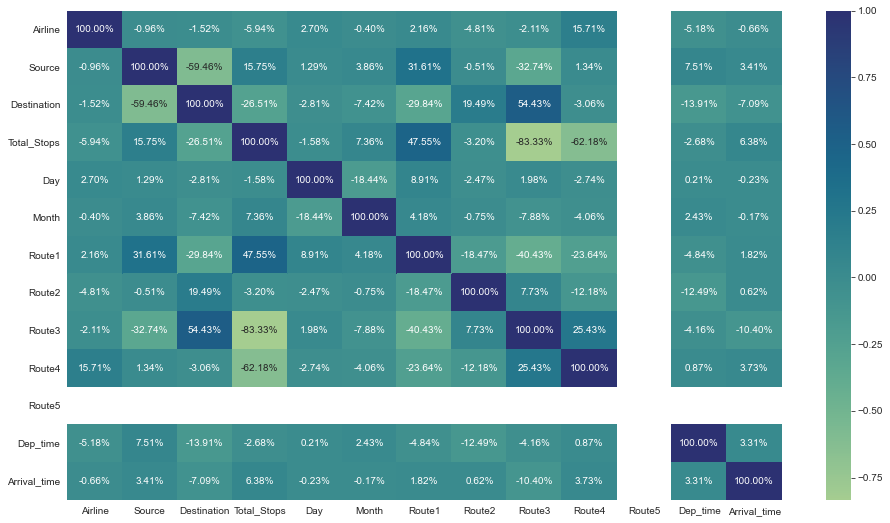

In [191]:
plt.figure(figsize=(16,9))
sns.heatmap(x_sc.corr() ,annot = True , cmap = 'crest'  , fmt = '.2%')

From above we can observe that there is not much correlation in between our predictor variable , so we didn't require PCA here.

## Machine Learning models

### Finding Best Random State

In [192]:
best_score=0
for i in range(2200):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x_sc, y, train_size = 0.7 , test_size = 0.3, random_state = i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_predicted = lr.predict(X_test)
    b_score= r2_score(y_test ,y_predicted )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 57.53258848966198 For Random state = 1036


In [193]:
X_train, X_test, y_train, y_test = train_test_split(x_sc , y, train_size=0.7, test_size=0.3, random_state= 1036)

model_reg = [LinearRegression,RandomForestRegressor, SVR, DecisionTreeRegressor,KNeighborsRegressor, GradientBoostingRegressor,
             ExtraTreesRegressor ,AdaBoostRegressor , Lasso , Ridge , ElasticNet ]


for model in model_reg:
    m = model()
    print('\n''Model: ',m)
    m.fit(X_train, y_train)
    scr=m.score(X_train,y_train)
    score = (m.score(X_test , y_test))
    print('\n''-->''Score:',score)
    scr_cross=cross_val_score(m,x_sc,y,cv=5)
    scr_mean=scr_cross.mean()
    print('Cross validation score: ',scr_mean)
    print('Difference between accuracy and cross validation score: ', scr-scr_mean)
    y_predicted = m.predict(X_test)
    print('Mean Absolute Error: ',mean_absolute_error(y_test, y_predicted))
    print('R2 Score' , r2_score(y_test , y_predicted))


Model:  LinearRegression()

-->Score: 0.5753258848966198
Cross validation score:  0.5451418108150304
Difference between accuracy and cross validation score:  -0.01092687891731503
Mean Absolute Error:  2120.3610188808834
R2 Score 0.5753258848966198

Model:  RandomForestRegressor()

-->Score: 0.8001494703248306
Cross validation score:  0.7923289549805037
Difference between accuracy and cross validation score:  0.14830533327789053
Mean Absolute Error:  1193.2491237712998
R2 Score 0.8001494703248306

Model:  SVR()

-->Score: 0.06456449285801436
Cross validation score:  0.07307915216808678
Difference between accuracy and cross validation score:  -0.009296787881874574
Mean Absolute Error:  3285.4016925918595
R2 Score 0.06456449285801436

Model:  DecisionTreeRegressor()

-->Score: 0.7025107647942528
Cross validation score:  0.7007191363417866
Difference between accuracy and cross validation score:  0.2523544872304848
Mean Absolute Error:  1358.6037971205626
R2 Score 0.7025107647942528

Model

From above we can observe that Random Forest Regressor and Gradient Boosting Regressor is giving us the best dcores so we will use these two algorithms only for our future predictions.

### Random Forest Regressor

In [194]:
best_score=0
for i in range(200):
    
    X_train, X_test, y_train, y_test = train_test_split(x_sc, y, train_size = 0.7 , test_size = 0.3, random_state = i)
    
    rf = RandomForestRegressor()
    rf.fit(X_train,y_train)
    pred_rf = rf.predict(X_test)
    b_score= r2_score(y_test ,pred_rf )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 81.01524264118716 For Random state = 30


In [195]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size = 0.3, random_state = 30)

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, rf_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, rf_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, rf_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, rf_pred))))

The R2 score=80.99568387777774
The MSE =3192927.5832435684
The MAE =1156.4557713213903
The RMSE =1786.8764879654018


In [196]:
# RandomForest Regressor Hyperparameter Tuning

rf = RandomForestRegressor()

rfr_params = {"n_estimators":[100,200],
              "criterion":['mse'],
              "max_depth":[6,8,10,20],
             }
gsRF = GridSearchCV(rf,param_grid = rfr_params, cv=3, scoring="r2", n_jobs= -1, verbose = 1)

gsRF.fit(X_train,y_train)

RF_best = gsRF.best_estimator_

gsRF.best_params_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   33.9s finished


{'criterion': 'mse', 'max_depth': 10, 'n_estimators': 200}

In [197]:
param_grid = {  'bootstrap': [True], 'max_depth': [10], 'max_features': ['auto', 'log2'], 
              'n_estimators': [100]}

rfr = RandomForestRegressor(random_state = 30)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

g_search.fit(X_train, y_train)
g_search_pred = g_search.predict(X_test)

In [198]:
print(g_search.score(X_test, y_test))

0.8505910084843779


<AxesSubplot:xlabel='Price'>

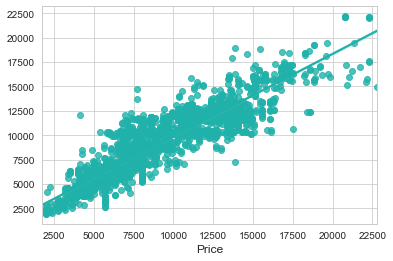

In [199]:
sns.regplot(y_test, g_search_pred , scatter = True , label = True , color = 'lightseagreen')

### Gradient Boosting Rgressor

In [200]:
best_score=0
for i in range(200):
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(x_sc, y, train_size = 0.7 , test_size = 0.3, random_state = i)
    
    gbr = GradientBoostingRegressor()
    gbr.fit(X_train,y_train)
    gbr_pred = gbr.predict(X_test)
    b_score= r2_score(y_test ,gbr_pred )
    if b_score>best_score:
        best_score=b_score
        randomState=i
    
print('Best Score = {} For Random state = {}'.format(best_score*100,randomState))

Best Score = 80.79347028929432 For Random state = 30


In [201]:
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size = 0.2, random_state = 30)

gbr = GradientBoostingRegressor()
gbr.fit(X_train , y_train)
gbr_pred = gbr.predict(X_test)
print('The R2 score={}'.format(r2_score(y_test, gbr_pred)*100))
print('The MSE ={}'.format(mean_squared_error(y_test, gbr_pred)))
print('The MAE ={}'.format(mean_absolute_error(y_test, gbr_pred)))
print('The RMSE ={}'.format(np.sqrt(mean_squared_error(y_test, gbr_pred))))

The R2 score=81.17383284490323
The MSE =3065692.644795894
The MAE =1319.3179459430035
The RMSE =1750.9119466140764


<AxesSubplot:xlabel='Price'>

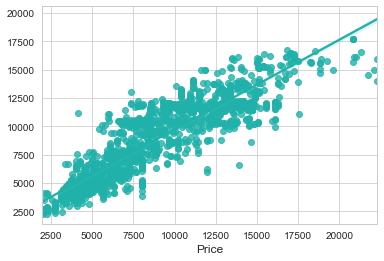

In [202]:
sns.regplot(y_test, gbr_pred , scatter = True , label = True , color = 'lightseagreen')